# Neil Opitz DSC 630 Final Project Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kstest, norm
import tabula

## Air Quality Data

In [2]:
# Import data
# Open and concatenate aqi data

# file name prefix for each annual file
name = "annual_aqi_by_county_"

k = 0

# for loop to import 1990 to 2019 data
for i in range(1990, 2020):
    
    # convert year to string
    j = str(i)
    
    # create file name by adding prefix and year
    filename = name + j + ".csv"
    
    # folder where annual files are stored
    folder = "C:\\Users\\neilo\\aqi_data\\"
    
    # concatenate folder and file name
    final_filename = folder +  filename
    
    # import each individual annual file
    data = pd.read_csv(final_filename)

    # if first file opened, no need to concatenate
    if k < 1:
        df = data
        
    # if not first file opened, concatenate to prior files
    if k >= 1:

        # concatenate data files
        df = pd.concat([df, data])
        
    k+=1

## Air Quality Data Preparation & Exploratory Data Analysis

In [3]:
# check for missing values in dataframe
missing_data_check = df.isnull().any()

# count for columns with no missing data
j = 0

for i in missing_data_check:
    
    # if there is missing data, print out row values
    if i == True:
        print(df.iloc[1])
        
    # if no missing data, count
    elif i == False:
        j+=1
    
# if no missing data in dataframe:
if j == len(df.columns):
    print('No missing data in dataframe.')

No missing data in dataframe.


In [4]:
# create dataframe of aqi data summed by state and year (median of median aqi)

aqi_dataframe = df.groupby(['State', 'Year']).agg({
    'Days with AQI': ['sum'],
    'Good Days': ['sum'], 'Moderate Days': ['sum'],
    'Unhealthy for Sensitive Groups Days': ['sum'],
    'Unhealthy Days': ['sum'],
    'Very Unhealthy Days': ['sum'],
    'Hazardous Days': ['sum'],
    'Median AQI': ['median']
}).reset_index()

# remove sum and median headers
aqi_dataframe.columns = aqi_dataframe.columns.droplevel(1)


aqi_dataframe.head()

,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Median AQI
0,Alabama,1990,4215,2982,831,331,67,4,0,27.0
1,Alabama,1991,4234,3272,713,220,29,0,0,23.5
2,Alabama,1992,4326,3376,696,217,37,0,0,24.0
3,Alabama,1993,4832,3492,973,303,60,4,0,28.0
4,Alabama,1994,5211,4078,824,269,40,0,0,29.0


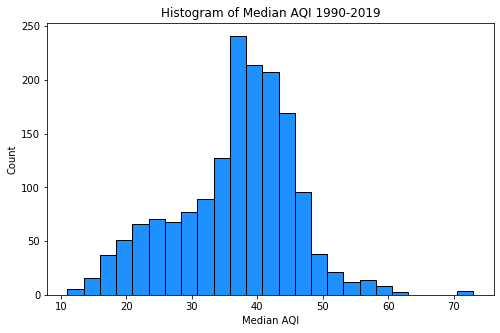

In [5]:
# histogram of median AQI
plt.figure(figsize=(8,5))

plt.hist(aqi_dataframe['Median AQI'], bins=25, color = 'dodgerblue', edgecolor = 'black') 
plt.title('Histogram of Median AQI 1990-2019')
plt.xlabel('Median AQI')
plt.ylabel('Count')

plt.savefig('Median_AQI.png')

plt.show()

In [6]:
# deeper look at outliers

outliers = aqi_dataframe[aqi_dataframe["Median AQI"] > 60]
outliers

,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Median AQI
232,Country Of Mexico,2000,793,221,339,142,49,34,8,71.0
238,Country Of Mexico,2006,1061,261,542,177,59,16,6,73.0
239,Country Of Mexico,2007,883,245,389,154,81,8,6,73.0
247,Country Of Mexico,2015,56,8,34,10,4,0,0,73.0
248,Country Of Mexico,2016,276,61,161,43,11,0,0,63.0
293,District Of Columbia,2001,365,100,224,30,9,2,0,62.0
1544,West Virginia,1990,4146,1878,1144,903,221,0,0,61.0


It turns out that the outliers are in the 'Country of Mexico', which will be removed from the data at a later stage as I am only using data from the 50 United States.  I will also be removing data from District of Columbia.  I do not consider the '61' from West Virginia an outlier.

In [7]:
aqi_dataframe['State'].value_counts()

Pennsylvania            30
Connecticut             30
Idaho                   30
Illinois                30
Tennessee               30
Ohio                    30
Arizona                 30
South Carolina          30
Arkansas                30
Wyoming                 30
Alabama                 30
North Dakota            30
Michigan                30
Rhode Island            30
West Virginia           30
Virginia                30
Utah                    30
South Dakota            30
Washington              30
Maryland                30
New Jersey              30
Maine                   30
Georgia                 30
New Mexico              30
Delaware                30
Country Of Mexico       30
Oregon                  30
Minnesota               30
Texas                   30
Massachusetts           30
Indiana                 30
Virgin Islands          30
Alaska                  30
Kentucky                30
Nebraska                30
North Carolina          30
Mississippi             30
H

In [8]:
abbrev_dict = {
    'California' : 'CA',
'Hawaii' : 'HI',
'Maine' : 'ME',
'Connecticut' : 'CT', 
'Georgia' : 'GA',
'Utah' : 'UT', 
'Mississippi' : 'MS', 
'Tennessee' : 'TN', 
'Colorado' : 'CO', 
'Alabama' : 'AL', 
'Rhode Island' : 'RI', 
'Massachusetts' : 'MA', 
'Iowa' : 'IA', 
'North Carolina' : 'NC', 
'Kansas' : 'KS', 
'Idaho' : 'ID', 
'Kentucky' : 'KY', 
'Minnesota' : 'MN', 
'West Virginia' : 'WV', 
'New York' : 'NY', 
'Michigan' : 'MI', 
'Florida' : 'FL', 
'South Carolina' : 'SC', 
'Illinois' : 'IL', 
'Ohio' : 'OH', 
'Oregon' : 'OR', 
'Pennsylvania' : 'PA', 
'Nevada' : 'NV', 
'Nebraska' : 'NE', 
'New Mexico' : 'NM', 
'Wyoming' : 'WY', 
'Arkansas' : 'AR', 
'North Dakota' : 'ND', 
'Texas' : 'TX',
'Montana' : 'MT', 
'Louisiana' : 'LA', 
'New Hampshire' : 'NH', 
'Wisconsin' : 'WI', 
'Maryland' : 'MD', 
'Washington' : 'WA', 
'Indiana' : 'IN', 
'South Dakota' : 'SD', 
'Alaska' : 'AK', 
'Virginia' : 'VA', 
'Delaware' : 'DE', 
'Oklahoma' : 'OK', 
'Vermont' : 'VT', 
'Missouri' : 'MO', 
'New Jersey' : 'NJ', 
'Arizona' : 'AZ'}

In [9]:
aqi_dataframe = aqi_dataframe.replace({'State' : abbrev_dict})

In [10]:
# change column headers to match energy production data headers

aqi_dataframe = aqi_dataframe.rename(columns={'State': 'STATE'})
aqi_dataframe = aqi_dataframe.rename(columns={'Year': 'YEAR'})

In [11]:
aqi_dataframe['STATE'].value_counts()

GA                      30
AK                      30
DE                      30
NJ                      30
WV                      30
IL                      30
NV                      30
VA                      30
KS                      30
NM                      30
CT                      30
VT                      30
MI                      30
NH                      30
FL                      30
NC                      30
MS                      30
WY                      30
SD                      30
HI                      30
KY                      30
OK                      30
AR                      30
OR                      30
OH                      30
IN                      30
Country Of Mexico       30
WI                      30
CO                      30
UT                      30
NY                      30
ID                      30
Virgin Islands          30
IA                      30
TX                      30
SC                      30
MT                      30
A

In [12]:
# drop data from non-states

aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['STATE'] == 'Puerto Rico'].index, inplace=True)
aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['STATE'] == 'Country Of Mexico'].index, inplace=True)
aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['STATE'] == 'Virgin Islands'].index, inplace=True)
aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['STATE'] == 'District Of Columbia'].index, inplace=True)
aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['STATE'] == 'Canada'].index, inplace=True)
aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['STATE'] == 'Guam'].index, inplace=True)

In [13]:
aqi_dataframe['STATE'].value_counts()

GA    30
FL    30
NJ    30
WV    30
IL    30
NV    30
VA    30
KS    30
NM    30
CT    30
VT    30
NH    30
NC    30
AK    30
MS    30
WY    30
SD    30
HI    30
KY    30
OK    30
AR    30
OR    30
OH    30
IN    30
DE    30
WI    30
CO    30
UT    30
ID    30
MI    30
IA    30
TX    30
SC    30
MT    30
AL    30
MO    30
NE    30
ME    30
RI    30
WA    30
CA    30
MN    30
AZ    30
MD    30
MA    30
LA    30
ND    30
TN    30
NY    30
PA    30
Name: STATE, dtype: int64

In [14]:
# drop year = 2019
aqi_dataframe.drop(aqi_dataframe[aqi_dataframe['YEAR'] == 2019].index, inplace=True)

In [15]:
# create a variable for percent of unhealthy days

# count total number of unhealthy days
aqi_dataframe['Num_Unhealthy_Days'] = aqi_dataframe['Unhealthy for Sensitive Groups Days'] + aqi_dataframe['Unhealthy Days'] + aqi_dataframe['Very Unhealthy Days'] + aqi_dataframe['Hazardous Days']

# divide count of unhealthy days by total days with monitored data
aqi_dataframe['Percent_Unhealthy_Days'] = aqi_dataframe['Num_Unhealthy_Days'] / aqi_dataframe['Days with AQI']

## Energy Production Data

In [16]:
# open energy generation data
# skip top row as it contains unnecessary information about dataset

gen = pd.read_excel('annual_generation_state.xls', skiprows=1, sheet_name = 'Net_Generation_1990-2018 Final')

In [17]:
gen.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0


## Energy Data Preparation & Exploratory Data Analysis

In [18]:
# check for missing values in dataframe
missing_data_check = gen.isnull().any()

# count for columns with no missing data
j = 0

for i in missing_data_check:
    
    # if there is missing data, print out row values
    if i == True:
        print(gen.iloc[1])
        
    # if no missing data, count
    elif i == False:
        j+=1
    
# if no missing data in dataframe:
if j == len(gen.columns):
    print('No missing data in dataframe.')

No missing data in dataframe.


In [20]:
# identify and remove redundant data

gen['TYPE OF PRODUCER'].value_counts()

Total Electric Power Industry                       14218
Electric Generators, Electric Utilities             10193
Combined Heat and Power, Industrial Power            8671
Electric Generators, Independent Power Producers     8131
Combined Heat and Power, Commercial Power            5398
Combined Heat and Power, Electric Power              5021
Name: TYPE OF PRODUCER, dtype: int64

In [21]:
# drop redundant rows

gen.drop(gen[gen['TYPE OF PRODUCER'] == 'Combined Heat and Power, Industrial Power'].index, inplace=True)
gen.drop(gen[gen['TYPE OF PRODUCER'] == 'Electric Generators, Electric Utilities'].index, inplace=True)
gen.drop(gen[gen['TYPE OF PRODUCER'] == 'Electric Generators, Independent Power Producers'].index, inplace=True)
gen.drop(gen[gen['TYPE OF PRODUCER'] == 'Combined Heat and Power, Commercial Power'].index, inplace=True)
gen.drop(gen[gen['TYPE OF PRODUCER'] == 'Combined Heat and Power, Electric Power'].index, inplace=True)

In [22]:
# confirm remaining data

gen['TYPE OF PRODUCER'].value_counts()

Total Electric Power Industry    14218
Name: TYPE OF PRODUCER, dtype: int64

In [23]:
# print energy sources

gen['ENERGY SOURCE'].value_counts()

Petroleum                         1509
Total                             1508
Natural Gas                       1462
Coal                              1442
Hydroelectric Conventional        1421
Other Biomass                     1256
Wood and Wood Derived Fuels       1037
Other                              993
Nuclear                            937
Other Gases                        802
Wind                               730
Pumped Storage                     560
Solar Thermal and Photovoltaic     393
Geothermal                         168
Name: ENERGY SOURCE, dtype: int64

In [24]:
# list of all energy sources in data

source = ['Natural_Gas',
'Coal',
'Petroleum',
'Other_Biomass',
'Hydroelectric_Conventional',
'Wood_Wood_Derived_Fuels',
'Other',
'Other_Gases',
'Wind',
'Nuclear',
'Solar_Thermal_Photovoltaic',
'Pumped_Storage',
'Geothermal']  

In [25]:
# add a column to dataframe for each energy source type

for i in source:
    gen[i] = 0

In [26]:
# populate new energy soure columns from ENERGY SOURCE column

gen['Natural_Gas'] = np.where(gen['ENERGY SOURCE']=='Natural Gas', gen['GENERATION (Megawatthours)'], 0)
gen['Petroleum'] = np.where(gen['ENERGY SOURCE']=='Petroleum', gen['GENERATION (Megawatthours)'], 0)
gen['Coal'] = np.where(gen['ENERGY SOURCE']=='Coal', gen['GENERATION (Megawatthours)'], 0)
gen['Other_Biomass'] = np.where(gen['ENERGY SOURCE']=='Other Biomass', gen['GENERATION (Megawatthours)'], 0)
gen['Hydroelectric_Conventional'] = np.where(gen['ENERGY SOURCE']=='Hydroelectric Conventional', gen['GENERATION (Megawatthours)'], 0)
gen['Wood_Wood_Derived_Fuels'] = np.where(gen['ENERGY SOURCE']=='Wood and Wood Derived Fuels', gen['GENERATION (Megawatthours)'], 0)
gen['Other'] = np.where(gen['ENERGY SOURCE']=='Other', gen['GENERATION (Megawatthours)'], 0)
gen['Other_Gases'] = np.where(gen['ENERGY SOURCE']=='Other Gases', gen['GENERATION (Megawatthours)'], 0)
gen['Wind'] = np.where(gen['ENERGY SOURCE']=='Wind', gen['GENERATION (Megawatthours)'], 0)
gen['Nuclear'] = np.where(gen['ENERGY SOURCE']=='Nuclear', gen['GENERATION (Megawatthours)'], 0)
gen['Solar_Thermal_Photovoltaic'] = np.where(gen['ENERGY SOURCE']=='Solar Thermal and Photovoltaic', gen['GENERATION (Megawatthours)'], 0)
gen['Pumped_Storage'] = np.where(gen['ENERGY SOURCE']=='Pumped Storage', gen['GENERATION (Megawatthours)'], 0)
gen['Geothermal'] = np.where(gen['ENERGY SOURCE']=='Geothermal', gen['GENERATION (Megawatthours)'], 0)

In [27]:
# create dataframe of energy production data summed by state and year

gen_dataframe = gen.groupby(['STATE', 'YEAR']).agg({
    'GENERATION (Megawatthours)': ['sum'],
    'Natural_Gas': ['sum'],
    'Petroleum': ['sum'],
    'Coal': ['sum'],
    'Other_Biomass': ['sum'],
    'Hydroelectric_Conventional': ['sum'],
    'Wood_Wood_Derived_Fuels': ['sum'],
    'Other': ['sum'],
    'Other_Gases': ['sum'],    
    'Wind': ['sum'],
    'Nuclear': ['sum'],
    'Solar_Thermal_Photovoltaic': ['sum'],
    'Pumped_Storage': ['sum'],
    'Geothermal': ['sum']
}).reset_index()

# remove sum and median headers
gen_dataframe.columns = gen_dataframe.columns.droplevel(1)

# compensate for double counting total generation hours
gen_dataframe['GENERATION (Megawatthours)'] = gen_dataframe['GENERATION (Megawatthours)'] / 2

gen_dataframe.head()

,STATE,YEAR,GENERATION (Megawatthours),Natural_Gas,Petroleum,Coal,Other_Biomass,Hydroelectric_Conventional,Wood_Wood_Derived_Fuels,Other,Other_Gases,Wind,Nuclear,Solar_Thermal_Photovoltaic,Pumped_Storage,Geothermal
0,,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AK,1990,5599506.0,3466261.0,497116.0,510573.0,0.0,974521.0,151035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AK,1991,5389828.0,3319395.0,513425.0,520514.0,0.0,896113.0,140381.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AK,1992,5298424.0,3214330.0,521950.0,495795.0,16295.0,918120.0,131934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AK,1993,5721277.0,3191814.0,587422.0,533123.0,15422.0,1302992.0,90504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# delete top row as 3 rows in data have '' value for STATE

gen_dataframe = gen_dataframe.iloc[1:]
gen_dataframe

,STATE,YEAR,GENERATION (Megawatthours),Natural_Gas,Petroleum,Coal,Other_Biomass,Hydroelectric_Conventional,Wood_Wood_Derived_Fuels,Other,Other_Gases,Wind,Nuclear,Solar_Thermal_Photovoltaic,Pumped_Storage,Geothermal
1,AK,1990,5599506.00,3466261.00,497116.00,510573.00,0.0,974521.00,151035.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,AK,1991,5389828.00,3319395.00,513425.00,520514.00,0.0,896113.00,140381.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,AK,1992,5298424.00,3214330.00,521950.00,495795.00,16295.0,918120.00,131934.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,AK,1993,5721277.00,3191814.00,587422.00,533123.00,15422.0,1302992.00,90504.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
5,AK,1994,5966516.00,3401175.00,562644.00,502866.00,16282.0,1345407.00,138142.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,WY,2014,49696183.36,557121.39,45123.24,43408651.03,0.0,868710.15,0.0,74052.91,336767.64,4405757.0,0.0,0.0,0.0,0.0
1505,WY,2015,48966518.50,722304.00,44898.00,43091189.00,0.0,868261.00,0.0,77772.00,405386.00,3756708.0,0.0,0.0,0.0,0.0
1506,WY,2016,46656630.50,788143.00,55636.00,40026874.00,0.0,973488.00,0.0,65014.00,358138.00,4389338.0,0.0,0.0,0.0,0.0
1507,WY,2017,46741846.00,778989.00,43846.00,40068566.00,0.0,1123624.00,0.0,45930.00,360236.00,4320655.0,0.0,0.0,0.0,0.0


In [29]:
gen_dataframe['TOTAL_GREEN_PRODUCTION'] = gen_dataframe['Geothermal'] + gen_dataframe['Pumped_Storage'] + gen_dataframe['Solar_Thermal_Photovoltaic'] + gen_dataframe['Wind'] + gen_dataframe['Hydroelectric_Conventional'] + gen_dataframe['Other_Biomass']
gen_dataframe['TOTAL_CONVENTIONAL_PRODUCTION'] = gen_dataframe['Petroleum'] + gen_dataframe['Wood_Wood_Derived_Fuels'] + gen_dataframe['Other_Gases'] + gen_dataframe['Other'] + gen_dataframe['Coal'] + gen_dataframe['Nuclear'] + gen_dataframe['Natural_Gas']

From energy production dataset description:

Other includes non-biogenic municipal solid waste, batteries, chemicals, hydrogen, pitch, purchased steam, 
sulfur, tire-derived fuels, and miscellaneous technologies.

Other Biomass includes biogenic municipal solid waste, landfill gas, sludge waste, 
agricultural byproducts, other biomass solids, other biomass liquids, 
and other biomass gases (including digester gases and methane). 


Other Gases includes blast furnace gas, propane gas, and other manufactured and waste gases derived from fossil fuels.

In [30]:
# create dataframe of annual US production

ng = gen_dataframe['Natural_Gas'].groupby(gen_dataframe['YEAR']).sum()
p = gen_dataframe['Petroleum'].groupby(gen_dataframe['YEAR']).sum()
c = gen_dataframe['Coal'].groupby(gen_dataframe['YEAR']).sum()
hc = gen_dataframe['Hydroelectric_Conventional'].groupby(gen_dataframe['YEAR']).sum()
wwdf = gen_dataframe['Wood_Wood_Derived_Fuels'].groupby(gen_dataframe['YEAR']).sum()
w = gen_dataframe['Wind'].groupby(gen_dataframe['YEAR']).sum()
n = gen_dataframe['Nuclear'].groupby(gen_dataframe['YEAR']).sum()
stp = gen_dataframe['Solar_Thermal_Photovoltaic'].groupby(gen_dataframe['YEAR']).sum()
ps = gen_dataframe['Pumped_Storage'].groupby(gen_dataframe['YEAR']).sum()
gt = gen_dataframe['Geothermal'].groupby(gen_dataframe['YEAR']).sum()
bio = gen_dataframe['Other_Biomass'].groupby(gen_dataframe['YEAR']).sum()
oth = gen_dataframe['Other'].groupby(gen_dataframe['YEAR']).sum()
othgas = gen_dataframe['Other_Gases'].groupby(gen_dataframe['YEAR']).sum()

In [31]:
# create new variables: perentage of annual state energy production

gen_dataframe['Natural_Gas_Percent'] = gen_dataframe['Natural_Gas'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Petroleum_Percent'] = gen_dataframe['Petroleum'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Coal_Percent'] = gen_dataframe['Coal'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Hydroelectric_Conventional_Percent'] = gen_dataframe['Hydroelectric_Conventional'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Wood_Wood_Derived_Fuels_Percent'] = gen_dataframe['Wood_Wood_Derived_Fuels'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Wind_Percent'] = gen_dataframe['Wind'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Nuclear_Percent'] = gen_dataframe['Nuclear'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Solar_Thermal_Photovoltaic_Percent'] = gen_dataframe['Solar_Thermal_Photovoltaic'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Pumped_Storage_Percent'] = gen_dataframe['Pumped_Storage'] / gen_dataframe['GENERATION (Megawatthours)']
gen_dataframe['Geothermal_Percent'] = gen_dataframe['Geothermal'] / gen_dataframe['GENERATION (Megawatthours)']                                                           
gen_dataframe['Other_Biomass_Percent'] = gen_dataframe['Other_Biomass'] / gen_dataframe['GENERATION (Megawatthours)']   
gen_dataframe['Other_Percent'] = gen_dataframe['Other'] / gen_dataframe['GENERATION (Megawatthours)']     
gen_dataframe['Other_Gases_Percent'] = gen_dataframe['Other_Gases'] / gen_dataframe['GENERATION (Megawatthours)'] 

In [32]:
# create macro-categories of energy types

gen_dataframe['conventional_percent'] = gen_dataframe['Natural_Gas_Percent'] + gen_dataframe['Petroleum_Percent'] + gen_dataframe['Coal_Percent'] + gen_dataframe['Wood_Wood_Derived_Fuels_Percent'] + gen_dataframe['Nuclear_Percent'] + gen_dataframe['Other_Percent'] + gen_dataframe['Other_Gases_Percent'] 

gen_dataframe['green_percent'] = gen_dataframe['Hydroelectric_Conventional_Percent'] + gen_dataframe['Wind_Percent'] + gen_dataframe['Solar_Thermal_Photovoltaic_Percent'] + gen_dataframe['Pumped_Storage_Percent'] + gen_dataframe['Geothermal_Percent'] + gen_dataframe['Other_Biomass_Percent'] 

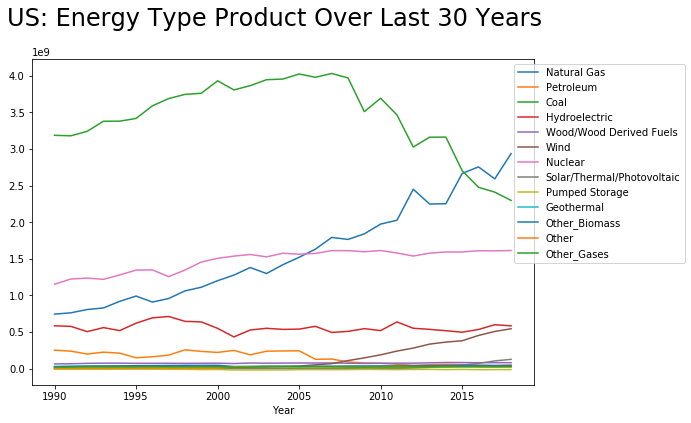

In [33]:
# chart of energy production by year by type

plt.figure(figsize=(9,6))

plt.suptitle('US: Energy Type Product Over Last 30 Years', fontsize=24, y=1)
plt.xlabel('Year')
plt.ylabel('')
plt.plot(ng, label="Natural Gas")
plt.plot(p, label="Petroleum")
plt.plot(c, label="Coal")
plt.plot(hc, label="Hydroelectric")
plt.plot(wwdf, label="Wood/Wood Derived Fuels")
plt.plot(w, label="Wind")
plt.plot(n, label="Nuclear")
plt.plot(stp, label="Solar/Thermal/Photovoltaic")
plt.plot(ps, label="Pumped Storage")
plt.plot(gt, label="Geothermal")
plt.plot(bio, label="Other_Biomass")
plt.plot(oth, label="Other")
plt.plot(othgas, label="Other_Gases")

plt.legend(bbox_to_anchor=(.95,1), loc='upper left')
#plt.legend(loc='lower left')

plt.savefig('Energy_Production.png')

plt.show()


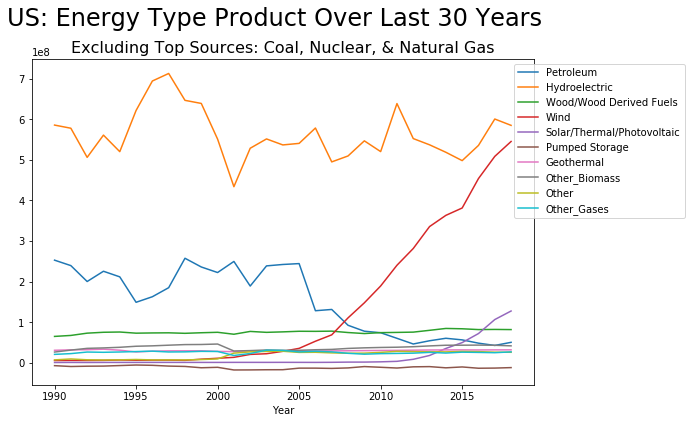

In [34]:
# plot of energy production by year by type for lower production types

plt.figure(figsize=(9,6))

plt.suptitle('US: Energy Type Product Over Last 30 Years', fontsize=24, y=1)
plt.title('Excluding Top Sources: Coal, Nuclear, & Natural Gas',fontsize=16)

plt.xlabel('Year')
plt.ylabel('')
#plt.plot(ng, label="Natural Gas")
plt.plot(p, label="Petroleum")
plt.plot(hc, label="Hydroelectric")
plt.plot(wwdf, label="Wood/Wood Derived Fuels")
plt.plot(w, label="Wind")
plt.plot(stp, label="Solar/Thermal/Photovoltaic")
plt.plot(ps, label="Pumped Storage")
plt.plot(gt, label="Geothermal")
plt.plot(bio, label="Other_Biomass")
plt.plot(oth, label="Other")
plt.plot(othgas, label="Other_Gases")

plt.legend(bbox_to_anchor=(.95,1), loc='upper left')

plt.savefig('Energy_Production_LesserTypesOnly.png')

plt.show()

In [35]:
gen_dataframe.STATE.value_counts()

GA          29
AK          29
DE          29
NJ          29
WV          29
IL          29
NV          29
VA          29
KS          29
NM          29
CT          29
VT          29
NH          29
FL          29
NC          29
MS          29
WY          29
SD          29
HI          29
KY          29
OK          29
AR          29
OR          29
OH          29
IN          29
WI          29
CO          29
UT          29
ME          29
ID          29
MI          29
IA          29
TX          29
SC          29
MT          29
DC          29
AL          29
MO          29
NE          29
RI          29
WA          29
CA          29
MN          29
AZ          29
MD          29
MA          29
LA          29
ND          29
TN          29
NY          29
PA          29
US-TOTAL    22
US-Total     7
Name: STATE, dtype: int64

In [36]:
# drop US-TOTAL rows

gen_dataframe.drop(gen_dataframe[gen_dataframe['STATE'] == 'US-TOTAL'].index, inplace=True)
gen_dataframe.drop(gen_dataframe[gen_dataframe['STATE'] == 'US-Total'].index, inplace=True)

In [37]:
gen_dataframe.STATE.value_counts()

GA    29
FL    29
NJ    29
WV    29
IL    29
NV    29
VA    29
KS    29
NM    29
CT    29
VT    29
NH    29
NC    29
WI    29
MS    29
WY    29
SD    29
HI    29
KY    29
OK    29
AR    29
OR    29
OH    29
IN    29
DE    29
CO    29
AK    29
ME    29
ID    29
MI    29
IA    29
TX    29
SC    29
MT    29
DC    29
AL    29
MO    29
NE    29
RI    29
UT    29
WA    29
CA    29
MN    29
AZ    29
MD    29
MA    29
LA    29
ND    29
TN    29
NY    29
PA    29
Name: STATE, dtype: int64

## Use tabula to import pdf table of California Wildfire Data

In [38]:
# import California wildfire data
pdf = "https://www.fire.ca.gov/media/11397/fires-acres-all-agencies-thru-2018.pdf"

# convert to csv
tabula.convert_into(pdf, "ca_fire_data.csv", pages = 1)

# read data from csv into dataframe
cal_fire = pd.read_csv('ca_fire_data.csv', skiprows = 1)
cal_fire

,Unnamed: 0,FIRES,ACRES,FIRES ACRES,FIRES** ACRES,FIRES.1,Unnamed: 6,ACRES.1
0,1987,"8,062","87,000","4,374 744,000","1,040 42,000","13,476",NaN,"873,000"
1,1988,"8,121","191,000","4,160 96,000","1,009 58,000","13,290",NaN,"345,000"
2,1989,"6,635","73,600","2,547 87,800","842 12,000","10,024",NaN,"173,400"
3,1990,"7,283","212,100","2,670 128,100","595 25,000","10,548",NaN,"365,200"
4,1991,"6,271","23,100","2,681 18,800","657 2,300","9,609",NaN,"44,200"
5,1992,"7,939","191,490","3,682 86,340","426 4,915","12,047",NaN,"282,745"
6,1993,"6,688","122,606","1,774 67,646","227 119,527","8,689",NaN,"309,779"
7,1994,"7,207","140,792","2,698 359,227","364 26,200","10,269",NaN,"526,219"
8,1995,"6,601","121,198","1,563 78,414","328 10,203","8,492",NaN,"209,815"
9,1996,"7,237","232,624","2,637 488,010","736 31,738","10,610",NaN,"752,372"


In [39]:
# create new dataframe with only columns needed
cal_annual_acres_burned = cal_fire[["Unnamed: 0","ACRES.1"]]

# change column headers to match energy production data headers
cal_annual_acres_burned = cal_annual_acres_burned.rename(columns={'Unnamed: 0': 'YEAR'})
cal_annual_acres_burned = cal_annual_acres_burned.rename(columns={'ACRES.1': 'ACRES_BURNED'})

cal_annual_acres_burned.drop(cal_annual_acres_burned[cal_annual_acres_burned['YEAR'] == '1987'].index, inplace=True)
cal_annual_acres_burned.drop(cal_annual_acres_burned[cal_annual_acres_burned['YEAR'] == '1988'].index, inplace=True)
cal_annual_acres_burned.drop(cal_annual_acres_burned[cal_annual_acres_burned['YEAR'] == '1989'].index, inplace=True)

cal_annual_acres_burned = cal_annual_acres_burned.drop([32,33,34,35]) 

cal_annual_acres_burned['STATE'] = 'CA'
cal_annual_acres_burned['YEAR'] = pd.to_numeric(cal_annual_acres_burned['YEAR'])
cal_annual_acres_burned["ACRES_BURNED"] = cal_annual_acres_burned["ACRES_BURNED"].str.replace(",","").astype(int)
cal_annual_acres_burned['ACRES_BURNED'] = pd.to_numeric(cal_annual_acres_burned['ACRES_BURNED'])

cal_annual_acres_burned

,YEAR,ACRES_BURNED,STATE
3,1990,365200,CA
4,1991,44200,CA
5,1992,282745,CA
6,1993,309779,CA
7,1994,526219,CA
8,1995,209815,CA
9,1996,752372,CA
10,1997,283885,CA
11,1998,215412,CA
12,1999,1172850,CA


## Merge Air Quality and Energy Production Data

In [40]:
# merge air quality and energy 

df = pd.merge(aqi_dataframe, gen_dataframe, how='left', left_on=['STATE', 'YEAR'], right_on = ['STATE', 'YEAR'])

In [41]:
# merge California wildfire data 

df = pd.merge(df, cal_annual_acres_burned, how='left', left_on=['YEAR', 'STATE'], right_on = ['YEAR', 'STATE'])

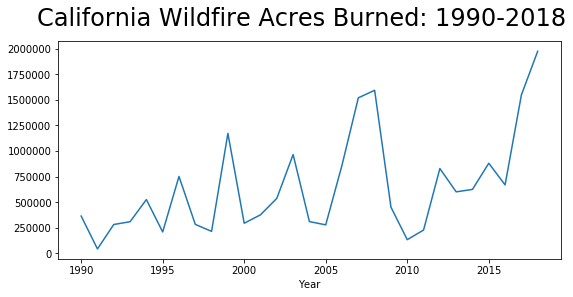

In [42]:
# line chart of California acres burned

annualacreburn = df['ACRES_BURNED'].groupby(df['YEAR']).sum()

plt.figure(figsize=(9,4))

plt.suptitle('California Wildfire Acres Burned: 1990-2018', fontsize=24, y=1)
plt.xlabel('Year')
plt.ylabel('')
plt.plot(annualacreburn, label="ACRES_BURNED")

plt.savefig('CA_Annual_Acre_Burn.png')

plt.show()

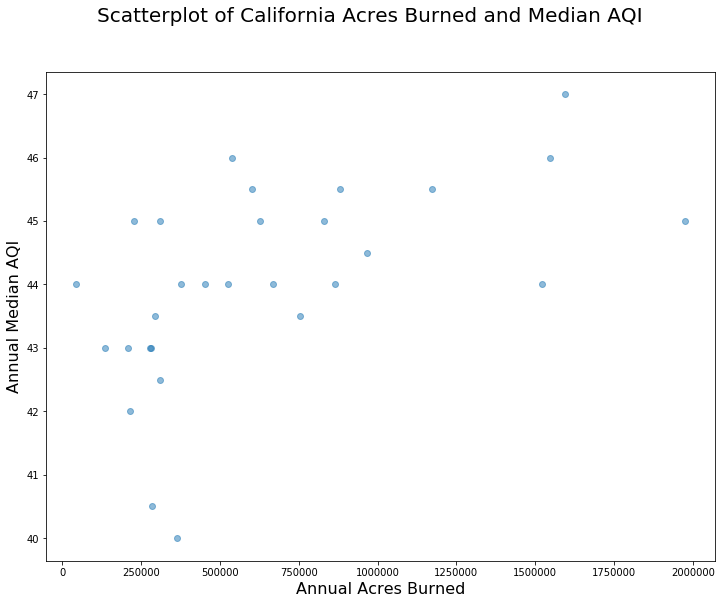

In [43]:
# chart of California acres burned and California AQI data


plt.figure(figsize=(12,9))

cal_data = df[df["STATE"] == 'CA']

x = cal_data['ACRES_BURNED'].groupby(df['YEAR']).sum()

y = cal_data['Median AQI'].groupby(df['YEAR']).sum()

# Plot
plt.scatter(x, y, alpha=0.5)
plt.suptitle('Scatterplot of California Acres Burned and Median AQI', fontsize=20)
plt.xlabel('Annual Acres Burned', fontsize = 16)
plt.ylabel('Annual Median AQI', fontsize = 16)

plt.savefig('CaliforniaBurnAQI.png')

plt.show()

In [44]:
# quantify the relationship in California between number of acres burned and air quality

cal_data = df[df["STATE"] == 'CA']
x = cal_data['ACRES_BURNED'].groupby(df['YEAR']).sum()
y = cal_data['Median AQI'].groupby(df['YEAR']).sum()

np.corrcoef(x,y)

array([[1.        , 0.55198068],
       [0.55198068, 1.        ]])

In [45]:
# descriptive statistics

df.describe()

,YEAR,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Median AQI,Num_Unhealthy_Days,...,Nuclear_Percent,Solar_Thermal_Photovoltaic_Percent,Pumped_Storage_Percent,Geothermal_Percent,Other_Biomass_Percent,Other_Percent,Other_Gases_Percent,conventional_percent,green_percent,ACRES_BURNED
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,2.900000e+01
mean,2004.000000,5938.833103,4293.237931,1342.671034,241.680690,54.317931,6.301379,0.624138,36.667241,302.924138,...,0.173537,1.687974e-03,-0.001364,0.002986,0.006426,0.002770,0.002598,0.863973,0.136027,6.500635e+05
std,8.369487,3913.675110,2707.899447,1130.865187,325.981293,105.977908,27.724606,3.245866,8.162121,440.686073,...,0.182939,9.122652e-03,0.003983,0.012567,0.011746,0.006194,0.007067,0.208225,0.208225,4.966844e+05
min,1990.000000,545.000000,349.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,...,-0.007057,-1.341994e-08,-0.030229,0.000000,-0.000002,-0.000496,0.000000,0.056983,-0.008459,4.420000e+04
25%,1997.000000,3025.500000,2220.500000,510.000000,38.000000,3.000000,0.000000,0.000000,32.500000,46.250000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000199,0.000000,0.000000,0.861224,0.018937,2.838850e+05
50%,2004.000000,4927.000000,3664.500000,1079.000000,112.000000,14.000000,0.000000,0.000000,38.000000,132.500000,...,0.131693,0.000000e+00,0.000000,0.000000,0.001323,0.000130,0.000000,0.950305,0.049695,5.262190e+05
75%,2011.000000,8279.250000,6008.000000,1779.250000,307.000000,55.000000,3.000000,0.000000,42.875000,367.750000,...,0.286806,0.000000e+00,0.000000,0.000000,0.008881,0.002541,0.001818,0.981063,0.138776,8.633450e+05
max,2018.000000,19038.000000,13618.000000,6866.000000,2105.000000,943.000000,396.000000,37.000000,61.000000,3154.000000,...,0.807704,1.380559e-01,0.013814,0.093017,0.118619,0.083236,0.126740,1.008459,0.943017,1.975086e+06


In [46]:
# drop columns no longer needed
cols = [
 'Days with AQI', 
 'Good Days', 
 'Moderate Days', 
 'Unhealthy for Sensitive Groups Days', 
 'Unhealthy Days', 
 'Very Unhealthy Days', 
 'Hazardous Days', 
 'GENERATION (Megawatthours)',        
 'Num_Unhealthy_Days'
]

df = df.drop(cols, axis=1) 

In [47]:
# create binary outcome variable based on arbitrary AQI value
# using AQI = 40 as it generates approximately 36% sample of relatively high AQI

df['AQI_GT38'] = 0
df.loc[df['Median AQI'] > 38, 'AQI_GT38'] = 1
df.AQI_GT38.value_counts()

0    743
1    707
Name: AQI_GT38, dtype: int64

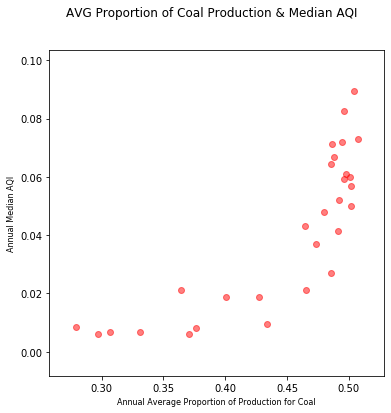

In [48]:
# scatterplot of average relative coal production percent and median AQI

plt.figure(figsize=(6,6))

x = df['Coal_Percent'].groupby(df['YEAR']).mean()
y = df['Percent_Unhealthy_Days'].groupby(df['YEAR']).median()

# Plot
plt.scatter(x, y, alpha=0.5, color = 'red')
plt.suptitle('AVG Proportion of Coal Production & Median AQI', fontsize=12)
plt.xlabel('Annual Average Proportion of Production for Coal', fontsize = 8)
plt.ylabel('Annual Median AQI', fontsize = 8)

plt.savefig('Scatter_Coal_AQI.png')

plt.show()

In [49]:
np.corrcoef(x,y)

array([[1.       , 0.8205939],
       [0.8205939, 1.       ]])

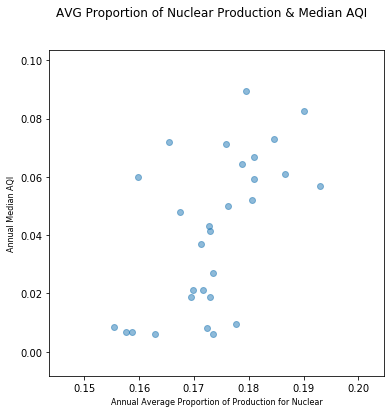

In [50]:
# scatterplot of average relative nuclear production percent and median AQI

plt.figure(figsize=(6,6))

x = df['Nuclear_Percent'].groupby(df['YEAR']).mean()
y = df['Percent_Unhealthy_Days'].groupby(df['YEAR']).median()

# Plot
plt.scatter(x, y, alpha=0.5)
plt.suptitle('AVG Proportion of Nuclear Production & Median AQI', fontsize=12)
plt.xlabel('Annual Average Proportion of Production for Nuclear', fontsize = 8)
plt.ylabel('Annual Median AQI', fontsize = 8)

plt.savefig('Scatter_Nuclear_AQI.png')

plt.show()

In [51]:
np.corrcoef(x,y)

array([[1.        , 0.59182851],
       [0.59182851, 1.        ]])

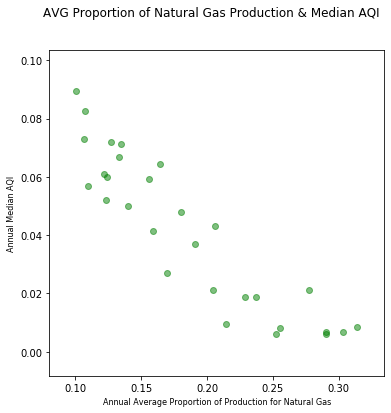

In [52]:
# scatterplot of average relative natural gas production percent and median AQI

plt.figure(figsize=(6,6))

x = df['Natural_Gas_Percent'].groupby(df['YEAR']).mean()
y = df['Percent_Unhealthy_Days'].groupby(df['YEAR']).median()

# Plot
plt.scatter(x, y, alpha=0.5, color = 'green')
plt.suptitle('AVG Proportion of Natural Gas Production & Median AQI', fontsize=12)
plt.xlabel('Annual Average Proportion of Production for Natural Gas', fontsize = 8)
plt.ylabel('Annual Median AQI', fontsize = 8)

plt.savefig('Scatter_NatGas_AQI.png')


In [53]:
np.corrcoef(x,y)

array([[ 1.        , -0.91165958],
       [-0.91165958,  1.        ]])

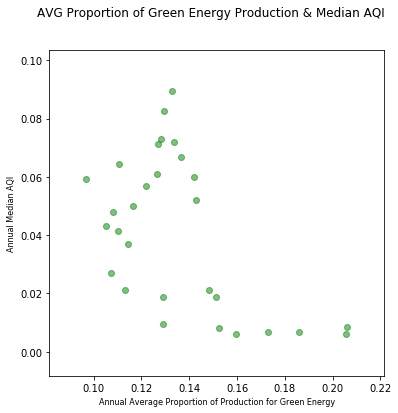

In [54]:
# scatterplot of average relative green energy production percent and median AQI 

plt.figure(figsize=(6,6))

x = df['green_percent'].groupby(df['YEAR']).mean()
y = df['Percent_Unhealthy_Days'].groupby(df['YEAR']).median()

# Plot
plt.scatter(x, y, alpha=0.5, color = 'green')
plt.suptitle('AVG Proportion of Green Energy Production & Median AQI', fontsize=12)
plt.xlabel('Annual Average Proportion of Production for Green Energy', fontsize = 8)
plt.ylabel('Annual Median AQI', fontsize = 8)

plt.savefig('Scatter_Green_AQI.png')

plt.show()

In [55]:
np.corrcoef(x,y)

array([[ 1.        , -0.53983257],
       [-0.53983257,  1.        ]])

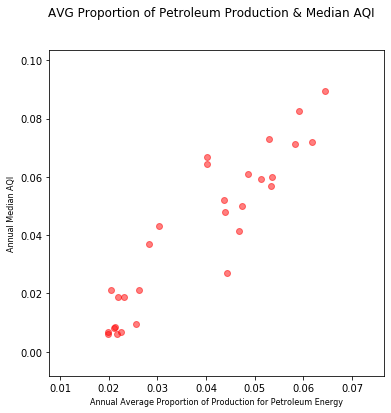

In [56]:
# scatterplot of average relative petroleum production percent and median AQI

plt.figure(figsize=(6,6))

x = df['Petroleum_Percent'].groupby(df['YEAR']).mean()
y = df['Percent_Unhealthy_Days'].groupby(df['YEAR']).median()

# Plot
plt.scatter(x, y, alpha=0.5, color = 'red')
plt.suptitle('AVG Proportion of Petroleum Production & Median AQI', fontsize=12)
plt.xlabel('Annual Average Proportion of Production for Petroleum Energy', fontsize = 8)
plt.ylabel('Annual Median AQI', fontsize = 8)

plt.savefig('Scatter_Petroleum_AQI.png')

plt.show()

In [57]:
np.corrcoef(x,y)

array([[1.      , 0.923465],
       [0.923465, 1.      ]])

### Create 2 unique datasets for regression

In [58]:
# Dataset 1 = all states
df1 = df

# Dataset 2 = California
df2 = df[df["STATE"] == 'CA']

## Save prepared datasets for R

In [58]:
# save data for R

df1.to_csv(r'dsc630final_all_sources.csv', index = False)

df2.to_csv(r'dsc630final_california.csv', index = False)

### Calculate the proportion of energy produced in the United States in 2018 that was 'green' energy

In [59]:
# create dataframe for year 2018
df2018 = df[df["YEAR"] == 2018]

In [60]:
# calculate the proportion of green energy produced in 2018
totalgreen = df2018['TOTAL_GREEN_PRODUCTION'].sum()
totalconventional = df2018['TOTAL_CONVENTIONAL_PRODUCTION'].sum()
totalpower = totalconventional + totalgreen
greenpercent2018 = totalgreen/totalpower
greenpower = round(greenpercent2018*100,0)
print('In 2018, {}% of all energy produced in the United States was green energy'.format(greenpower))

In 2018, 16.0% of all energy produced in the United States was green energy


In [61]:
remainder = 100-greenpower
print('Production of green energy would have to increase by {}% to get to 100% green energy production.'.format(remainder))

Production of green energy would have to increase by 84.0% to get to 100% green energy production.


In [62]:
# calculate the median AQI across states for 2018
medaqi2018 = df2018['Median AQI'].median()
print('The median AQI across all states in 2018 was {}.'.format(medaqi2018))

The median AQI across all states in 2018 was 36.0.


In [63]:
# calculate the change in AQI based on converting all energy produced to green energy
green_impact = 0.153
aqi_change = remainder*green_impact
green_aqi = medaqi2018 - aqi_change
print('Based on a linear model for this project, converting to 100% green energy would result in a {} point decline in the median AQI, which for 2018 data would be a change from {} to {}.'.format(aqi_change, medaqi2018, green_aqi))

Based on a linear model for this project, converting to 100% green energy would result in a 12.852 point decline in the median AQI, which for 2018 data would be a change from 36.0 to 23.148.


In [64]:
est_convert = (4.5 + 5.7)/2
est_per_aqi = est_convert / aqi_change

print('Estimates suggest it would cost approxamately ${} trillion to transition to 100% green energy.  This equates to approximately ${} trillion for each 1 point improvement in AQI.'.format(est_convert, est_per_aqi))

Estimates suggest it would cost approxamately $5.1 trillion to transition to 100% green energy.  This equates to approximately $0.3968253968253968 trillion for each 1 point improvement in AQI.


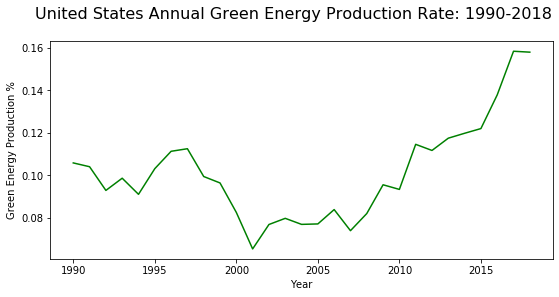

In [65]:
# create chart of annual green energy production in US

# sum conventional and green data production values by year
annual_conventional = df['TOTAL_CONVENTIONAL_PRODUCTION'].groupby(df['YEAR']).sum()
annual_green = df['TOTAL_GREEN_PRODUCTION'].groupby(df['YEAR']).sum()

# convert to dataframes and merge
annual_conventional.to_frame()
annual_green.to_frame()
powerdf = pd.merge(annual_conventional,annual_green, on = 'YEAR')

# calculate annual green % rate
powerdf['green_percent'] = powerdf['TOTAL_GREEN_PRODUCTION'] / (powerdf['TOTAL_CONVENTIONAL_PRODUCTION'] + powerdf['TOTAL_GREEN_PRODUCTION'])

# create line chart
green = powerdf['green_percent']

plt.figure(figsize=(9,4))

plt.suptitle('United States Annual Green Energy Production Rate: 1990-2018', fontsize=16, y=1)
plt.xlabel('Year')
plt.ylabel('Green Energy Production %')
plt.plot(green, color = 'green')

plt.savefig('Annual_Green_Energy_Rate.png')

plt.show()